<a href="https://colab.research.google.com/github/EisaacJC/MOOP/blob/main/FirstAttempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Correct implementation

In [48]:
import numpy as np
import matplotlib.pyplot as plt
def buckin_n6(x):
    #This works well, so no changes, i believe
    x1, x2 = x
    term1 = 100 * np.sqrt(np.abs(x2 - 0.01*x1**2))
    term2 = 0.01 * np.abs(x1 + 10)
    return term1 + term2
def himmelblau(x):
    x1, x2 = x
    term1=np.power(x1**2+x2-11,2)
    term2=np.power(x1+x2**2,2)
    return term1+term2
def mccormick_function(x):
    x1,x2=x
    return np.sin(x1 + x2) + (x1 - x2)**2 - 1.5*x1 + 2.5*x2 + 1
def hessian(f, x, h):
    H = np.zeros((len(x), len(x)))
    for i in range(len(x)):
        for j in range(i, len(x)):
            xph = x.copy()
            xph[i] += h
            xmh = x.copy()
            xmh[i] -= h
            fxph = f(xph)
            fxmh = f(xmh)
            H[i,j] = (fxph - fxmh) / (2*h)
            H[j,i] = H[i,j]
    return H
def sqp(f, x0, lb, ub, maxiter=20, tol=1e-3, tol_f=1e-6):
    h = 0.1
    fvals = []
    points = []
    for i in range(maxiter):
        fx = f(x0)
        dfx = grad(f, x0, h)
        fvals.append(fx)
        points.append(x0.copy())
        Hfx = hessian(f, x0, h)
        dx = -np.linalg.inv(Hfx) @ dfx
        grad_proj = np.dot(dfx, dx)
        t = line_search(f, x0, dx, grad_proj)
        x0 = x0 + t * dx
        x0 = np.clip(x0, lb, ub)

        print("Iter {}, x0 = {}, f(x0) = {}".format(i, x0, fx))

        if np.linalg.norm(dx) < tol:
            print("Converged!")
            break

    return x0, points, fvals

def grad(f, x, h):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_plus_h = x.copy()
        x_plus_h[i] += h
        x_minus_h = x.copy()
        x_minus_h[i] -= h
        grad[i] = (f(x_plus_h) - f(x_minus_h)) / (2 * h)
    return grad
def line_search(f, x0, dx, grad_proj):
    tol_ls = 1e-6
    alpha = 0.3
    beta = 0.5
    t = 1.0
    phi = f(x0)
    while True:
        fx = f(x0 + t * dx)
        if fx <= phi + alpha * t * grad_proj:
            break
        t *= beta
        if t < tol_ls:
            break
    return t

### Buckin N6

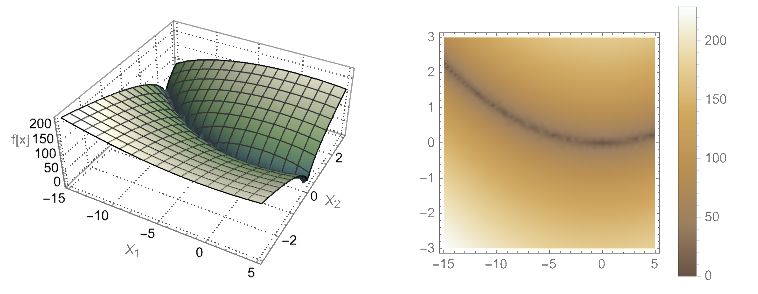

In [49]:
lb = np.array([-15, -3])
ub = np.array([-5, 3])
x0 = np.asarray([np.random.uniform(-15,-5),np.random.uniform(-3,3)])
xmin, points, vals = sqp(buckin_n6, x0,lb,ub)
print(xmin)
print(buckin_n6(xmin))

Iter 0, x0 = [-6.75695983  0.48640709], f(x0) = 39.38240197916724
Iter 1, x0 = [-6.75695983  0.45515709], f(x0) = 17.307275209923777
Iter 2, x0 = [-6.75695983  0.45515613], f(x0) = 3.784727944683885
Iter 3, x0 = [-6.75695983  0.45515518], f(x0) = 3.785998516740264
Iter 4, x0 = [-6.75695983  0.45515423], f(x0) = 3.7872686588571494
Iter 5, x0 = [-6.75695983  0.45515327], f(x0) = 3.7885383714706986
Iter 6, x0 = [-6.75695983  0.45515232], f(x0) = 3.7898076550163315
Iter 7, x0 = [-6.75695983  0.45515137], f(x0) = 3.791076509928733
Iter 8, x0 = [-6.75695983  0.45515041], f(x0) = 3.7923449366418542
Iter 9, x0 = [-6.75695983  0.45514946], f(x0) = 3.793612935588915
Iter 10, x0 = [-6.75695983  0.4551485 ], f(x0) = 3.794880507202405
Iter 11, x0 = [-6.75695983  0.45514755], f(x0) = 3.7961476519140858
Iter 12, x0 = [-6.75695983  0.4551466 ], f(x0) = 3.797414370154992
Iter 13, x0 = [-6.75695983  0.45514564], f(x0) = 3.7986806623554332
Iter 14, x0 = [-6.75695983  0.45514469], f(x0) = 3.79994652894499

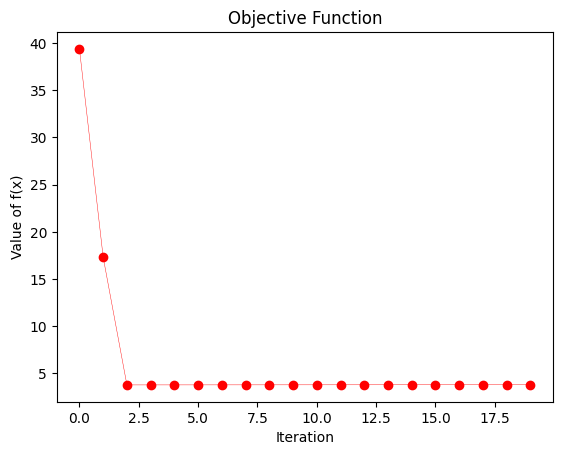

In [54]:
plt.plot(np.arange(0,len(vals)),vals,c="red",linewidth=0.3,marker = 'o')
plt.title("Objective Function")
plt.ylabel("Value of f(x)")
plt.xlabel("Iteration")
plt.show()

## Himmelblau's function

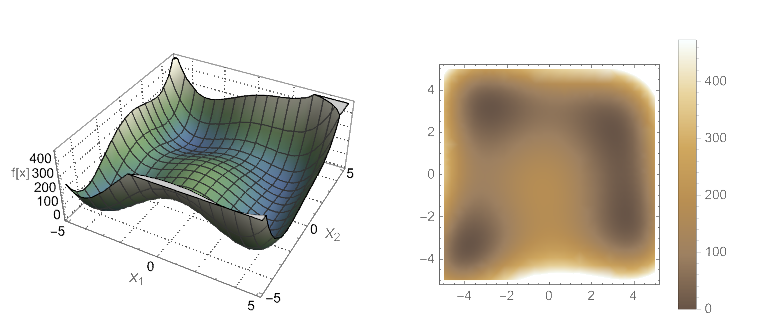

In [46]:
lb = np.array([-5, -5])
ub = np.array([5, 5])
x0 = np.asarray([np.random.uniform(-5,5),np.random.uniform(-5,5)])
print(x0)
#x0=np.asarray([0,0])
xmin, points, vals = sqp(himmelblau, x0,lb,ub)
print(xmin)
print(himmelblau(xmin))

[3.07138032 4.02094897]
Iter 0, x0 = [3.07138032 3.02094897], f(x0) = 376.1786504655658
Iter 1, x0 = [3.07138032 2.02094897], f(x0) = 150.89438805083924
Iter 2, x0 = [3.07138032 1.02094897], f(x0) = 51.40923921830293
Iter 3, x0 = [3.07138032 0.02094897], f(x0) = 17.22042864372947
Iter 4, x0 = [3.07138032 0.02094802], f(x0) = 11.825181002891402
Iter 5, x0 = [3.07138032 0.02094706], f(x0) = 11.825183705555649
Iter 6, x0 = [3.07138032 0.02094611], f(x0) = 11.825186408232893
Iter 7, x0 = [3.07138032 0.02094516], f(x0) = 11.825189110923136
Iter 8, x0 = [3.07138032 0.0209442 ], f(x0) = 11.825191813626375
Iter 9, x0 = [3.07138032 0.02094325], f(x0) = 11.825194516342611
[3.07138032 0.02094325]
11.825197219071846


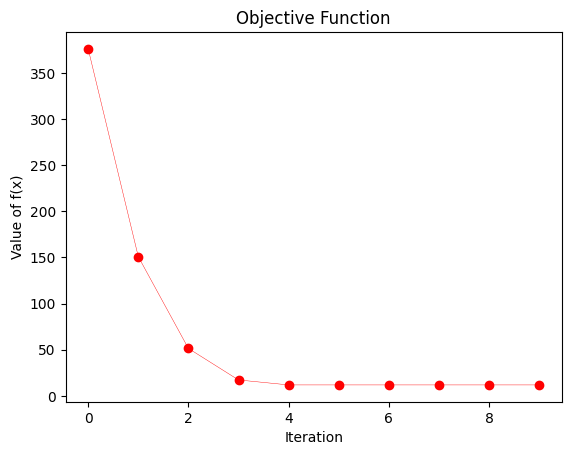

In [47]:
plt.plot(vals,c="red",linewidth=0.3,marker = 'o')
plt.title("Objective Function")
plt.ylabel("Value of f(x)")
plt.xlabel("Iteration")
plt.show()

## McCormick Fuction

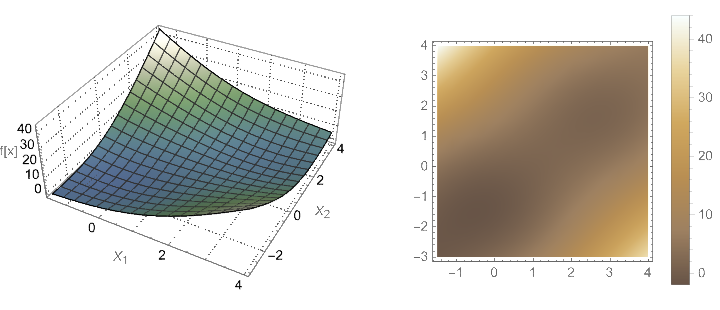

In [44]:
lb = np.array([-1.5, -3])
ub = np.array([4, 4])
x0 = np.asarray([np.random.uniform(-1.5,4),np.random.uniform(-3,4)])
mccormick_function(x0)
xmin, points, vals = sqp(mccormick_function, x0,lb,ub)
print(xmin)
print(mccormick_function(xmin))

Iter 0, x0 = [ 0.69784612 -0.63210902], f(x0) = 1.8569744736165772
Iter 1, x0 = [ 0.69784612 -1.13210902], f(x0) = 0.207428703998358
Iter 2, x0 = [ 0.69784612 -1.13210998], f(x0) = 0.05095225026781902
Iter 3, x0 = [ 0.69784612 -1.13211093], f(x0) = 0.05095249129090673
Iter 4, x0 = [ 0.69784612 -1.13211189], f(x0) = 0.05095273231619668
Iter 5, x0 = [ 0.69784612 -1.13211284], f(x0) = 0.05095297334368798
Iter 6, x0 = [ 0.69784612 -1.13211379], f(x0) = 0.05095321437338107
Iter 7, x0 = [ 0.69784612 -1.13211475], f(x0) = 0.050953455405275516
Iter 8, x0 = [ 0.69784612 -1.1321157 ], f(x0) = 0.0509536964393722
Iter 9, x0 = [ 0.69784612 -1.13211665], f(x0) = 0.05095393747567023
[ 0.69784612 -1.13211665]
0.050954178514170057


Text(0.5, 0, 'Iteration')

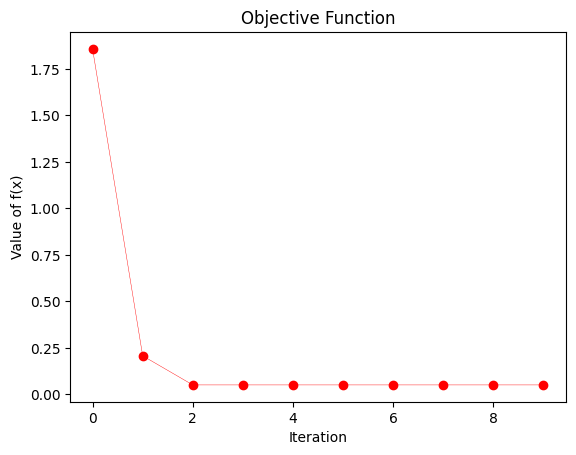

In [45]:
plt.plot(vals,c="red",linewidth=0.3,marker = 'o')
plt.title("Objective Function")
plt.ylabel("Value of f(x)")
plt.xlabel("Iteration")
plt.show()

## An interesting approach (somewhere i missed a sign and i cant really find where)

In [1]:
def gradient(f, x, h):
    #Naive implementation of gradient
    grad = np.zeros_like(x)
    for i in range(len(x)):
        xh = x.copy()
        xh[i] += h
        fxh = f(xh)
        xh[i] -= 2*h
        fxh2 = f(xh)
        grad[i] = (fxh - fxh2) / (2*h)
    return grad

In [19]:
def sqp(f, x0,lb,ub, maxiter=10, tol=1e-3, tol_f=1e-6):
    h=0.1
    fvals = []
    points = []
    for i in range(maxiter):
        #x0 = np.clip(x0, lb, ub) #this is not necessary so delete it after
        fx = f(x0) #evaluation of the function
        dfx = gradient(f, x0,h) #calculate the numerical gradient
        """remember that h towards zero can be interpr]eted also as stabilization
        or in some cases being lower capable of finding other minima"""
        fvals.append(fx)#append current value of the function
        points.append(x0.copy())#ok, so copy the current solution
        Hfx = hessian(f, x0,h)#numerical evaluation of Hessian of f(x)
        #Some tricks taken from stackoverflow to be less computational expensive
        dx = -np.linalg.inv(Hfx) @ dfx
        #ok, now we're only doing \nabla{f(x)}*dr, i believe(?
        grad_proj = np.dot(dfx, dx)
        t = line_search(f, x0, dx, grad_proj)
        x0 =x0+ t * dx
        #a kind of momenta operator but a naive implementation and also check
        #if this stochastic implementation isnt bad
        """
        if i>0 and abs(fvals[i] - fvals[i-1]) / abs(fvals[i-1]) < tol:
            #This can take out of our local minima but also worsen the
            #objective function
            #is it that ok?¡
            if np.random.uniform()>0.5:
                x0=x0+np.random.uniform(-0.3,0.3)+t*dx
            else:
                x0=x0
        """
        #asegurando que tras la perturbación se encuentre dentro del espacio
        #las soluciones tienden a irse a -4
        x0 = np.clip(x0, lb, ub)
        #solución usando fuerza bruta, restringiendola
        #al espacio de búsqueda.

        print("Iter {}, x0 = {}, f(x0) = {}".format(i, x0, fx))
    return x0, points, fvals
def line_search(f, x0, dx, grad_proj):
    """Just some code that i took from here:
    https://stackoverflow.com/questions/52204231/implementing-backtracking-line-search-algorithm-for-unconstrained-optimization-p"""
    tol_ls = 1e-6
    a, b = 0, 1
    phi = f(x0)
    while True:
        t = (a + b) / 2
        fx = f(x0 + t * dx)
        if fx < phi - grad_proj * t + 0.5 * t**2:
            b = t
        else:
            a = t
        if abs(b - a) < tol_ls:
            return t

In [20]:
lb = np.array([-15, -3])
ub = np.array([-5, 3])
x0 = np.asarray([np.random.uniform(-15,-5),np.random.uniform(-3,3)])
xmin, points, vals = sqp(buckin_n6, x0,lb,ub)
print(xmin)
print(buckin_n6(xmin))

Iter 0, x0 = [-13.43393477   2.59044924], f(x0) = 88.67655051419604
Iter 1, x0 = [-13.43393477   2.59044829], f(x0) = 88.67649672071587
Iter 2, x0 = [-13.43393477   2.59044733], f(x0) = 88.67644292720304
Iter 3, x0 = [-13.43393477   2.59044638], f(x0) = 88.67638913365758
Iter 4, x0 = [-13.43393477   2.59044542], f(x0) = 88.67633534007948
Iter 5, x0 = [-13.43393477   2.59044447], f(x0) = 88.67628154646873
Iter 6, x0 = [-13.43393477   2.59044352], f(x0) = 88.67622775282533
Iter 7, x0 = [-13.43393477   2.59044256], f(x0) = 88.67617395914928
Iter 8, x0 = [-13.43393477   2.59044161], f(x0) = 88.67612016544058
Iter 9, x0 = [-13.43393477   2.59044066], f(x0) = 88.67606637169925
[-13.43393477   2.59044066]
88.67601257792526


In [21]:
s=np.asarray([np.random.uniform(-5,5),np.random.uniform(-5,5)])
print(s)
x0 = np.clip(s, lb, ub)
print(x0)

[ 4.98116629 -0.91436066]
[-5.         -0.91436066]


In [22]:
lb = np.array([-5, -5])
ub = np.array([5, 5])
x0 = np.asarray([np.random.uniform(-5,5),np.random.uniform(-5,5)])
print(x0)
#x0=np.asarray([0,0])
xmin, points, vals = sqp(himmelblau, x0,lb,ub)
print(xmin)
print(himmelblau(xmin))

[ 2.45458843 -2.94587282]
Iter 0, x0 = [ 2.45458843 -3.94587187], f(x0) = 186.67839382338857
Iter 1, x0 = [ 2.45458843 -4.94587092], f(x0) = 404.46423403995504
Iter 2, x0 = [ 2.45458843 -5.        ], f(x0) = 822.9068993530045
Iter 3, x0 = [ 2.45458843 -5.        ], f(x0) = 853.2549636992991
Iter 4, x0 = [ 2.45458843 -5.        ], f(x0) = 853.2549636992989
Iter 5, x0 = [ 2.45458843 -5.        ], f(x0) = 853.2549636992985
Iter 6, x0 = [ 2.45458843 -5.        ], f(x0) = 853.2549636992985
Iter 7, x0 = [ 2.45458843 -5.        ], f(x0) = 853.2549636992983
Iter 8, x0 = [ 2.45458843 -5.        ], f(x0) = 853.2549636992982
Iter 9, x0 = [ 2.45458843 -5.        ], f(x0) = 853.2549636992982
[ 2.45458843 -5.        ]
853.254963699298


In [25]:
lb = np.array([-1.5, -3])
ub = np.array([4, 4])
x0 = np.asarray([np.random.uniform(-1.5,4),np.random.uniform(-3,4)])
mccormick_function(x0)
xmin, points, vals = sqp(mccormick_function, x0,lb,ub)
print(xmin)
print(mccormick_function(xmin))

Iter 0, x0 = [ 3.6212338  -2.76061701], f(x0) = 21.089228234807777
Iter 1, x0 = [ 3.6212338 -3.       ], f(x0) = 30.152871334839336
Iter 2, x0 = [ 3.6212338 -3.       ], f(x0) = 32.49092522267569
Iter 3, x0 = [ 3.6212338 -3.       ], f(x0) = 32.49092522267569
Iter 4, x0 = [ 3.6212338 -3.       ], f(x0) = 32.49092522267569
Iter 5, x0 = [ 3.6212338 -3.       ], f(x0) = 32.49092522267569
Iter 6, x0 = [ 3.6212338 -3.       ], f(x0) = 32.49092522267569
Iter 7, x0 = [ 3.6212338 -3.       ], f(x0) = 32.49092522267569
Iter 8, x0 = [ 3.6212338 -3.       ], f(x0) = 32.49092522267569
Iter 9, x0 = [ 3.6212338 -3.       ], f(x0) = 32.49092522267569
[ 3.6212338 -3.       ]
32.49092522267569


In [26]:
s= np.asarray([np.random.uniform(-15,-5),np.random.uniform(-3,3)])
x0 = s
learning_rate = 0.1
lb = np.array([-15, -3])
ub = np.array([-5, 3])

for i in range(1000):
  g = gradient(buckin_n6, x0, 0.1)
  x0 = x0 - learning_rate*g

print("GradientDescent result:", x0)
print("Function value:", buckin_n6(x0))
x0 = s
result = sqp(buckin_n6, x0,lb,ub)

print("SQP result:", result[0])
print("Function value:", buckin_n6(result[0]))

GradientDescent result: [-0.24893419 10.1697043 ]
Function value: 318.98753279140107
Iter 0, x0 = [-8.63383249 -1.29705505], f(x0) = 102.11589651873189
Iter 1, x0 = [-8.63383249 -2.29705409], f(x0) = 142.929220041996
Iter 2, x0 = [-8.63383249 -3.        ], f(x0) = 174.4408593438667
Iter 3, x0 = [-8.63383249 -3.        ], f(x0) = 193.54481251429462
Iter 4, x0 = [-8.63383249 -3.        ], f(x0) = 193.54481251429462
Iter 5, x0 = [-8.63383249 -3.        ], f(x0) = 193.54481251429462
Iter 6, x0 = [-8.63383249 -3.        ], f(x0) = 193.54481251429462
Iter 7, x0 = [-8.63383249 -3.        ], f(x0) = 193.54481251429462
Iter 8, x0 = [-8.63383249 -3.        ], f(x0) = 193.54481251429462
Iter 9, x0 = [-8.63383249 -3.        ], f(x0) = 193.54481251429462
SQP result: [-8.63383249 -3.        ]
Function value: 193.54481251429462


## Using libraries to plot and also check if everything works kinda well

[-9.14618735  0.83652738]


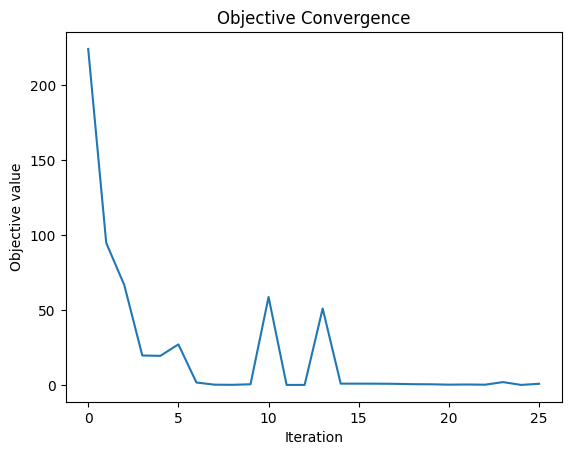

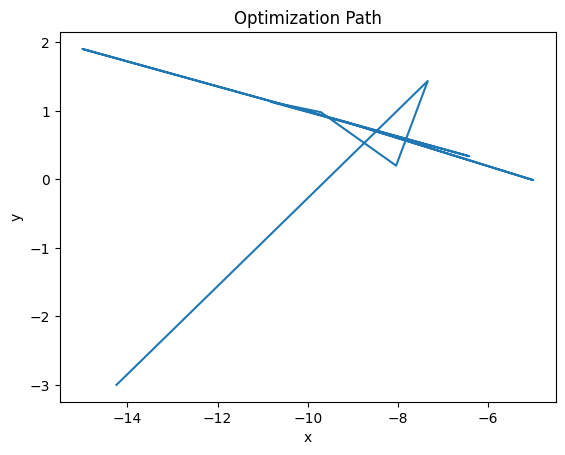

In [ ]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

history = []
fvals = []
x0=np.asarray([np.random.uniform(-15,-5),np.random.uniform(-3,3)])
def callback(xk):
  fvals.append(buckin_n6(xk))
  history.append(xk)
def custom_callback(xk):
    if len(fvals) >= 1000:
        return True  # Terminate optimization
    else:
        callback(xk)
        return False
bounds = [(-15, -5), (-3, 3)]
x0=np.asarray([np.random.uniform(-15,-5),np.random.uniform(-3,3)])
res = minimize(buckin_n6, x0, method='SLSQP', bounds=bounds,callback=custom_callback,options={'maxiter': 1000})
print(res.x)
# Plot objective function history
plt.plot(range(len(fvals)), fvals)
plt.xlabel('Iteration')
plt.ylabel('Objective value')
plt.title('Objective Convergence')
plt.show()
# Plot x-y history
x_history = [pnt[0] for pnt in history]
y_history = [pnt[1] for pnt in history]

plt.plot(x_history, y_history)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimization Path')

plt.show()

[-3.77931099 -3.2832042 ]


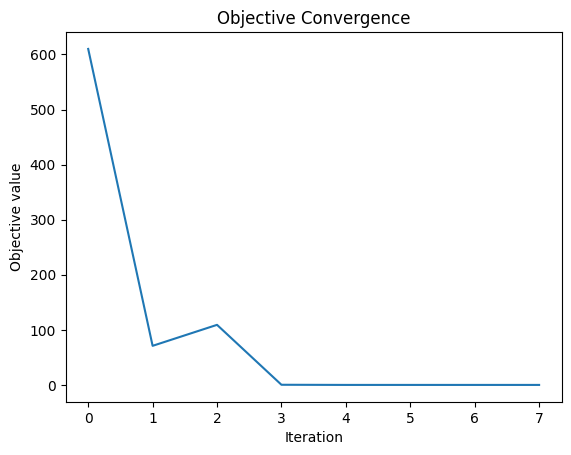

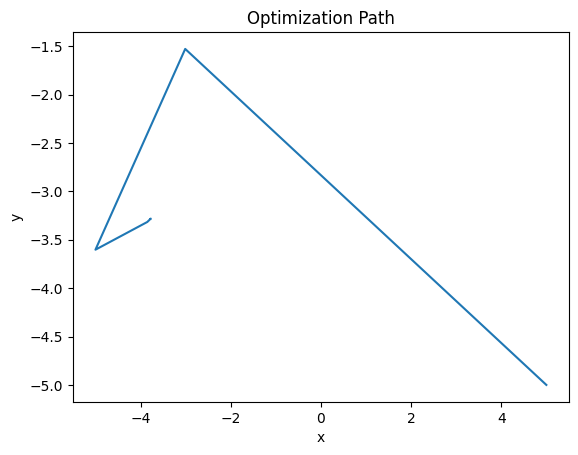

In [ ]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

history = []
fvals = []

def callback(xk):
  fvals.append(himmelblau(xk))
  history.append(xk)
bounds = [(-5, 5), (-5, 5)]
x0=np.asarray([np.random.uniform(-5,-5),np.random.uniform(-5,5)])
res = minimize(himmelblau, x0, method='SLSQP', bounds=bounds,callback=callback,options={'maxiter': 100})
print(res.x)
# Plot objective function history
plt.plot(range(len(fvals)), fvals)
plt.xlabel('Iteration')
plt.ylabel('Objective value')
plt.title('Objective Convergence')
plt.show()
# Plot x-y history
x_history = [pnt[0] for pnt in history]
y_history = [pnt[1] for pnt in history]

plt.plot(x_history, y_history)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimization Path')

plt.show()

[-0.54766073 -1.5472599 ]


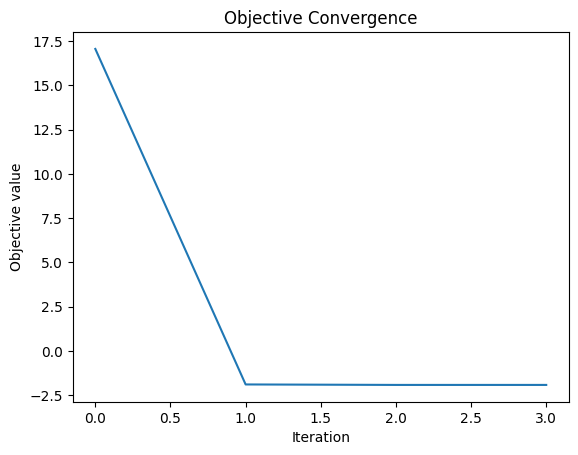

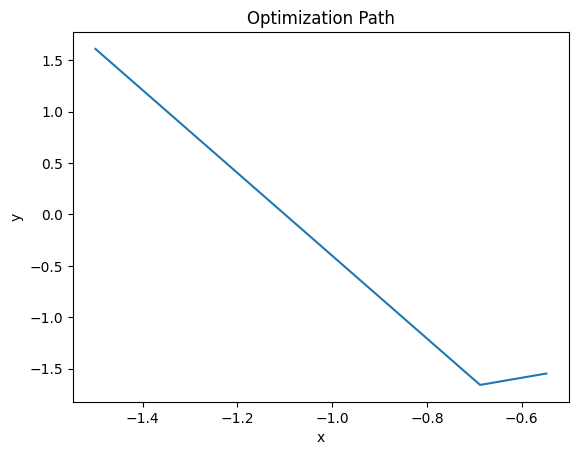

In [ ]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

history = []
fvals = []

def callback(xk):
  fvals.append(mccormick_function(xk))
  history.append(xk)
bounds = [(-1.5, 4), (-3, 4)]
x0=np.asarray([np.random.uniform(-1.5,3),np.random.uniform(-3,4)])
res = minimize(mccormick_function, x0, method='SLSQP', bounds=bounds,callback=callback,options={'maxiter': 100})
print(res.x)
# Plot objective function history
plt.plot(range(len(fvals)), fvals)
plt.xlabel('Iteration')
plt.ylabel('Objective value')
plt.title('Objective Convergence')
plt.show()
# Plot x-y history
x_history = [pnt[0] for pnt in history]
y_history = [pnt[1] for pnt in history]

plt.plot(x_history, y_history)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimization Path')

plt.show()